In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [ ]:
df = pd.read_csv('Salary_Data.csv')

In [ ]:
df.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
print(f'In Salary Data {df.shape[0]} Rows and {df.shape[1]} Columns')

In Salary Data 30 Rows and 2 Columns


In [ ]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
X = df[['YearsExperience']].values
Y = df[['Salary']].values

In [ ]:
plt.style.use('seaborn-darkgrid')

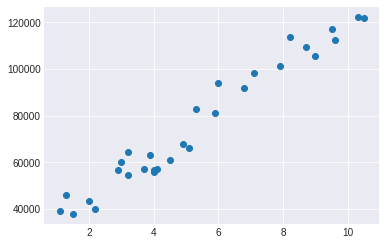

In [ ]:
plt.scatter(X,Y)  #from this we get to know that it is following a  linear relationship

In [ ]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


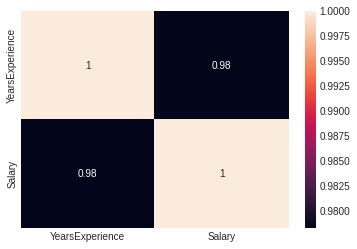

In [ ]:
sns.heatmap(df.corr(), annot = True)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()  #obj created
reg.fit(x_train, y_train)  #model build

LinearRegression()

In [ ]:
y_pred = reg.predict(x_test)

In [ ]:
reg.coef_

array([[9360.26128619]])

In [ ]:
reg.intercept_

array([26777.3913412])

In [ ]:
reg.score(x_test, y_test)

0.9740993407213511

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  #used to see how the model is performing

MAE: 3737.417861878896
MSE: 23370078.800832972
RMSE: 4834.260936361728


Text(0, 0.5, 'Salary')

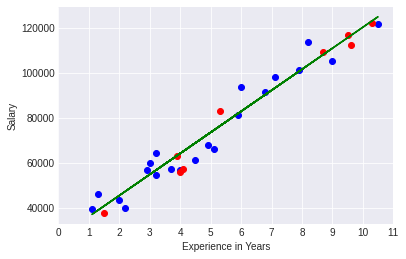

In [ ]:
plt.figure()
plt.scatter(x_train, y_train, color = 'blue')
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, reg.predict(x_train), color = 'green')
plt.xticks(range(0,12))
plt.xlabel('Experience in Years')
plt.ylabel('Salary')